# 01. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

# 02. Import Data

In [2]:
# path shortcut
path = r'C:\Users\georg\Documents\2025-04-07 - NBA Game Analysis\Data'

In [3]:
# import wrangled dataset
df_games = pd.read_csv(os.path.join(path, 'games_wrangeled.csv'), index_col = False)

# 03. Data Cleaning

In [4]:
# Prepping data for k-means algo
df_games_prep = df_games.drop(['GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT', 'SEASON', 'TEAM_ID_home', 'TEAM_ID_away', 'HOME_TEAM_NAME', 'HOME_CITY', 'AWAY_TEAM_NAME', 'AWAY_CITY', 'HOME_STATE_FULL', 'AWAY_STATE_FULL', 'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away'], axis = 1)

In [5]:
df_games_prep.columns

Index(['Unnamed: 0', 'PTS_home', 'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home',
       'AST_home', 'REB_home', 'HOME_TEAM_WINS'],
      dtype='object')

# 04. Elbow Technique

In [6]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [7]:
score = [kmeans[i].fit(df_games_prep).score(df_games_prep) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-1559955830518.1438,
 -389996666440.0794,
 -173343594780.82205,
 -97522751499.97855,
 -62432648170.526184,
 -43365210445.58548,
 -31862240550.00143,
 -24437953137.10259,
 -19310784410.234764]

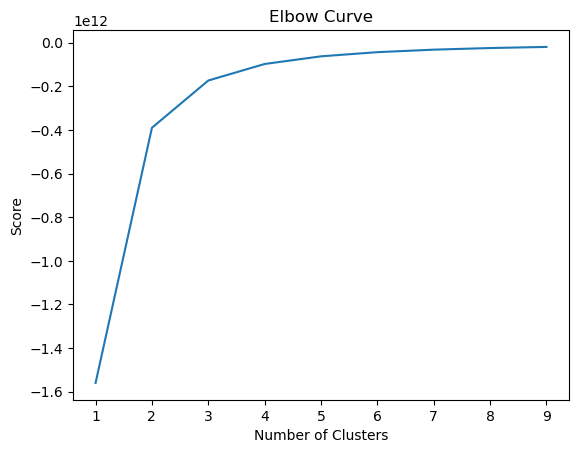

In [8]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### the optimal number of clusters is 3

# 05. k-Means Clustering

In [9]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [10]:
# Fit the k-means object to the data.

kmeans.fit(df_games_prep)

KMeans(n_clusters=3)

In [11]:
df_games_prep['clusters'] = kmeans.fit_predict(df_games_prep)

In [12]:
df_games_prep.head()

,Unnamed: 0,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,HOME_TEAM_WINS,clusters
0,0,126.0,0.484,0.926,0.382,25.0,46.0,1,2
1,1,120.0,0.488,0.952,0.457,16.0,40.0,1,2
2,2,114.0,0.482,0.786,0.313,22.0,37.0,1,2
3,3,113.0,0.441,0.909,0.297,27.0,49.0,1,2
4,4,108.0,0.429,1.000,0.378,22.0,47.0,0,2


In [13]:
df_games_prep['clusters'].value_counts()

clusters
1    8900
0    8851
2    8801
Name: count, dtype: int64

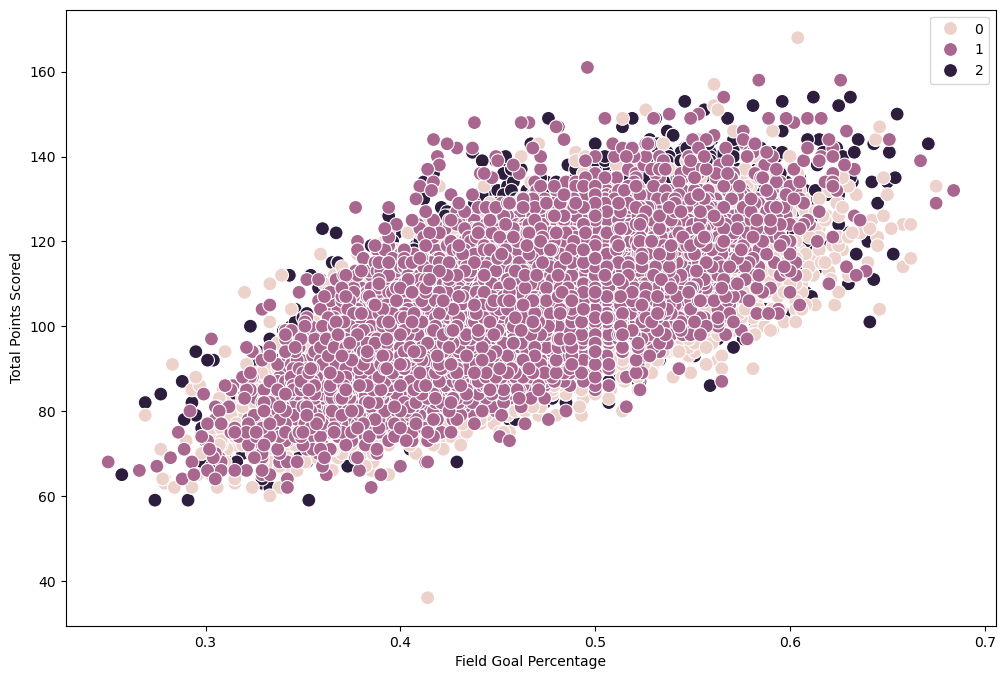

In [14]:
# Plot the clusters for the "PTS_home" and "FG_PCT_home" variables.

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df_games_prep['FG_PCT_home'], y = df_games_prep['PTS_home'], hue = kmeans.labels_, s = 100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Field Goal Percentage') # Label x-axis.
plt.ylabel('Total Points Scored') # Label y-axis.
plt.show()

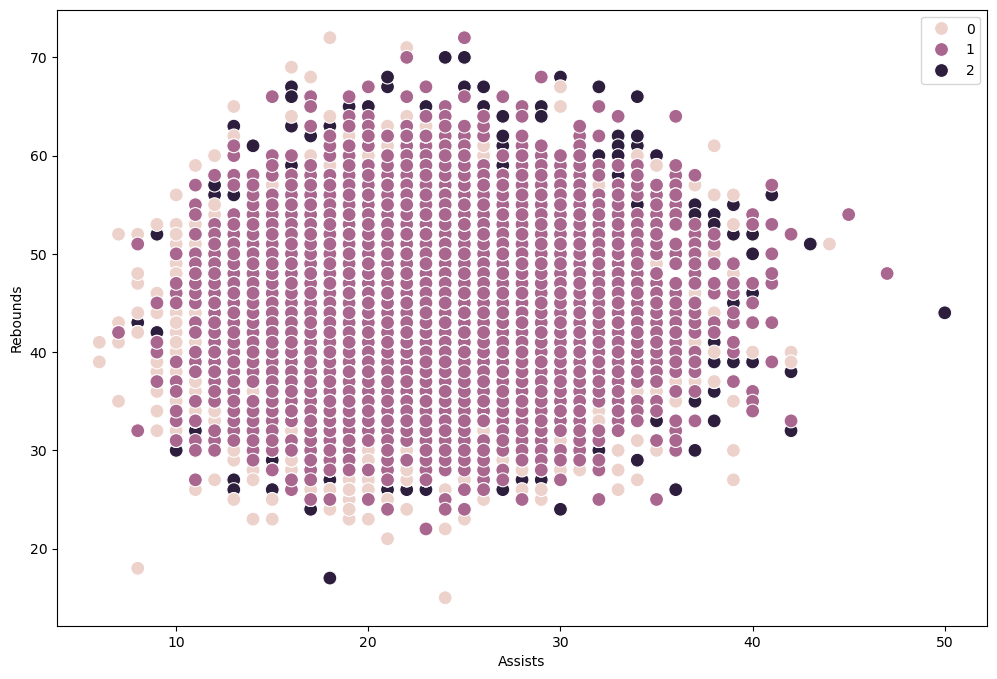

In [15]:
# Plot the clusters for the "AST_home" and "REB_home" variables.

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df_games_prep['AST_home'], y = df_games_prep['REB_home'], hue = kmeans.labels_, s = 100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Assists') # Label x-axis.
plt.ylabel('Rebounds') # Label y-axis.
plt.show()

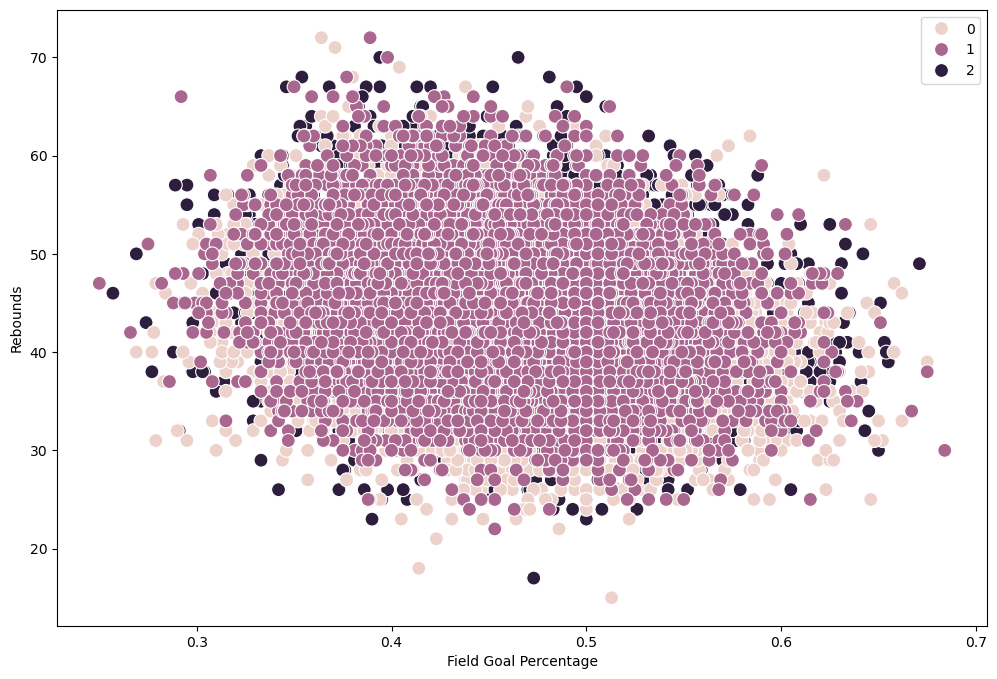

In [16]:
# Plot the clusters for the "FG_PCT_home" and "REB_home" variables.

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df_games_prep['FG_PCT_home'], y = df_games_prep['REB_home'], hue = kmeans.labels_, s = 100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Field Goal Percentage') # Label x-axis.
plt.ylabel('Rebounds') # Label y-axis.
plt.show()

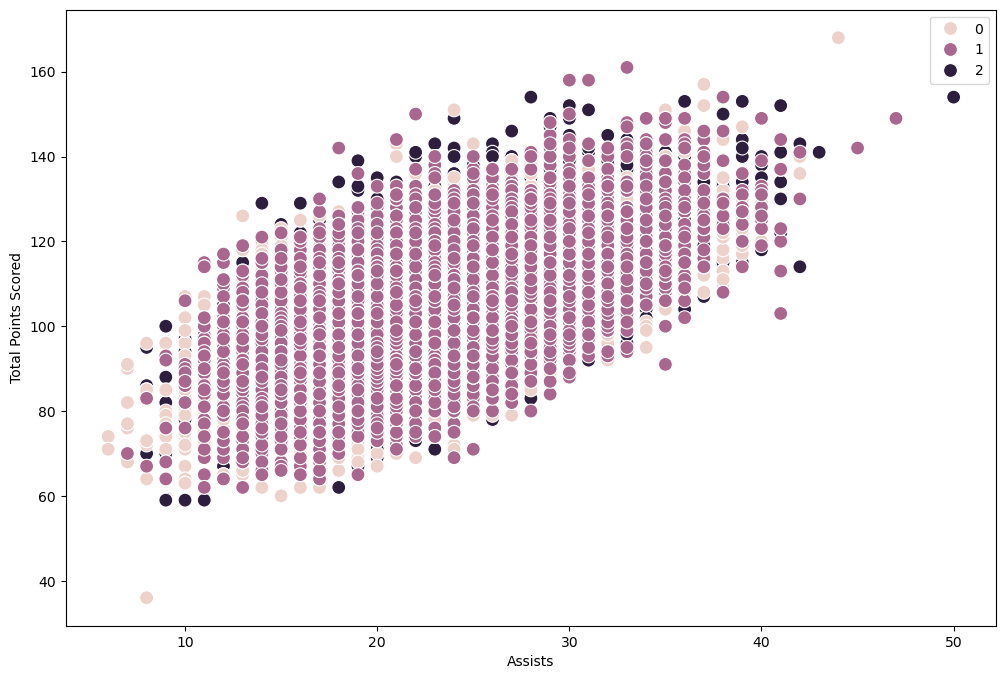

In [17]:
# Plot the clusters for the "PTS_home" and "AST_home" variables.

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df_games_prep['AST_home'], y = df_games_prep['PTS_home'], hue = kmeans.labels_, s = 100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Assists') # Label x-axis.
plt.ylabel('Total Points Scored') # Label y-axis.
plt.show()

In [18]:
df_games_prep.loc[df_games_prep['clusters'] == 2, 'cluster'] = 'dark purple'
df_games_prep.loc[df_games_prep['clusters'] == 1, 'cluster'] = 'purple'
df_games_prep.loc[df_games_prep['clusters'] == 0, 'cluster'] = 'pink'

In [19]:
df_games_prep.groupby('cluster').agg({'PTS_home':['mean', 'median'], 
                         'FG_PCT_home':['mean', 'median'], 
                         'AST_home':['mean', 'median'],
                          'REB_home':['mean', 'median']})

PTS_home        FG_PCT_home          AST_home         \
                   mean median        mean median       mean median   
cluster                                                               
dark purple  105.601295  105.0    0.462358  0.462  23.410976   23.0   
pink         100.275336  100.0    0.462124  0.462  21.871540   22.0   
purple       104.497416  104.0    0.457749  0.457  23.189101   23.0   

              REB_home         
                  mean median  
cluster                        
dark purple  43.693785   44.0  
pink         42.136934   42.0  
purple       44.288876   44.0

### Cluster Interpretation:
#### - Dark Purple: seems to be the "high performance" cluster - teams in this group score the most, shoot the best and assist the most. 
#### - Purple: Slightly above average cluster
#### - Pink: Efficient, but not as good as purple

### The clusters reflect subtle but distinct patterns in scoring, FG%, assists, and rebounds. They are not dramatically different, but they do highlight variations in efficiency and output. 

### Use in Analytics Pipeline: 
### We could use these reuslts for deeper analysis. We could analyze win rates by cluster, see if certain teams consistently fall into the high-output cluster, track how a team's performance shifts over season or over the years. 

# 06. Export Data

In [20]:
df_games_prep.to_csv(os.path.join(path, 'games_kmean.csv'))